# Analyzing [Stack Overflow Annual Developer Surveys](https://insights.stackoverflow.com/survey).

In [192]:
import pandas as pd

In [193]:
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 999

In [194]:
surveys = {
    "2011": {
        "data": "2011 Stack Overflow Survey Results/2011 Stack Overflow Survey Results.csv",
        "readme": None,
        "schema": None
    },
    "2012": {
        "data": "2012 Stack Overflow Survey Results/2012 Stack Overflow Survey Results.csv",
        "readme": None,
        "schema": None
    },
    "2013": {
        "data": "2013 Stack Overflow Survey Responses/2013 Stack Overflow Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2014": {
        "data": "2014 Stack Overflow Survey Responses/2014 Stack Overflow Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2015": {
        "data": "2015 Stack Overflow Developer Survey Responses/2015 Stack Overflow Developer Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2016": {
        "data": "2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv",
        "readme": "2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/READ_ME_-_The_Public_2016_Stack_Overflow_Developer_Survey_Results.txt",
        "schema": None
    },
    "2017": {
        "data": "developer_survey_2017/survey_results_public.csv",
        "readme": "developer_survey_2017/README_2017.txt",
        "schema": "developer_survey_2017/survey_results_schema.csv"
    },
    "2018": {
        "data": "developer_survey_2018/survey_results_public.csv",
        "readme": "developer_survey_2018/README_2018.txt",
        "schema": "developer_survey_2018/survey_results_schema.csv"
    },
    "2019": {
        "data": "developer_survey_2019/survey_results_public.csv",
        "readme": "developer_survey_2019/README_2019.txt",
        "schema": "developer_survey_2019/survey_results_schema.csv"
    },
    "2020": {
        "data": "developer_survey_2020/survey_results_public.csv",
        "readme": "developer_survey_2020/README_2020.txt",
        "schema": "developer_survey_2020/survey_results_schema.csv"
    }
}

In [195]:
def search_schema(df, string):
    """Searches schema's DataFrame columns 'Question' for the word match.
    Args:
        df (pandas.DataFrame):
        string (str):
    Returns:
        DataFrame containing labels and questions with the matched word.
    """
    if 'Question' in df.columns:
        return df[df['Question'].str.contains('\W*'+string+'\W*', case=False, regex=True)]
    return df[df['QuestionText'].str.contains('\W*'+string+'\W*', case=False, regex=True)]

def search_columns(df, string):
    """Searches DataFrame's columns for the word match.
    Args:
        df (pandas.DataFrame):
        string (str):
    Returns:
        List containing all the columns with the word match.
    """
    return df.columns[df.columns.str.contains('\W*'+string+'\W*', case=False, regex=True)].tolist()

In [196]:
import matplotlib.pyplot as plt
import numpy as np

In [197]:
survey_2017 = pd.read_csv(surveys['2017']['data'], low_memory=True)
survey_2017.shape

(51392, 154)

In [198]:
intervals = [i for i in range(10000, 100001, 10000)] + [i for i in range(120000, 200001, 20000)]

def process_salary(df):
    dataframe = df.copy()
    dataframe = dataframe.dropna(subset=['Salary'], axis=0)
    dataframe['Salary'] = dataframe['Salary'].apply(lambda x: intervals[np.argmin(abs(np.array(intervals) - x))])
    return dataframe

def process_overpaid(df):
    dataframe = df.copy()
    dataframe['Overpaid'] = dataframe['Overpaid'].fillna('Unknown')
    return dataframe

def make_dummies(df, col, prefix):
    dataframe = pd.get_dummies(df, columns=[col], prefix=prefix)
    return dataframe

survey_2017_clean = survey_2017.copy()
survey_2017_clean = process_salary(survey_2017_clean)
survey_2017_clean = process_overpaid(survey_2017_clean)
overpaid_list = ['Overpaid_'+i for i in survey_2017_clean['Overpaid'].unique()]
survey_2017_clean = make_dummies(survey_2017_clean, 'Overpaid', 'Overpaid')

In [199]:
set(survey_2017_clean.columns).difference(set(survey_2017))

{'Overpaid_Greatly overpaid',
 'Overpaid_Greatly underpaid',
 'Overpaid_Neither underpaid nor overpaid',
 'Overpaid_Somewhat overpaid',
 'Overpaid_Somewhat underpaid',
 'Overpaid_Unknown'}

In [200]:
overpaid_dict = {
    "Overpaid_Greatly underpaid": "Greatly underpaid",
    "Overpaid_Somewhat underpaid": "Somewhat underpaid",
    "Overpaid_Neither underpaid nor overpaid": "Neither",
    "Overpaid_Somewhat overpaid": "Somewhat overpaid",
    "Overpaid_Greatly overpaid": "Greatly overpaid",
    "Overpaid_Unknown": "Not sure"
}

In [201]:
salary_overpaid_2017 = survey_2017_clean[['Salary']+overpaid_list].groupby(by='Salary').sum()
salary_overpaid_2017

,Overpaid_Neither underpaid nor overpaid,Overpaid_Somewhat underpaid,Overpaid_Somewhat overpaid,Overpaid_Greatly underpaid,Overpaid_Unknown,Overpaid_Greatly overpaid
Salary,,,,,,
10000,603.0,928.0,86.0,457.0,17.0,21.0
20000,295.0,466.0,43.0,156.0,1.0,10.0
30000,356.0,590.0,71.0,193.0,4.0,5.0
40000,481.0,678.0,66.0,163.0,1.0,8.0
50000,534.0,721.0,62.0,164.0,2.0,7.0
60000,474.0,592.0,88.0,121.0,2.0,4.0
70000,334.0,435.0,57.0,68.0,1.0,1.0
80000,285.0,334.0,43.0,44.0,1.0,7.0
90000,265.0,271.0,55.0,31.0,1.0,3.0


In [202]:
salary_overpaid_2017['Total'] = salary_overpaid_2017.sum(axis=1)

In [203]:
def convert_xticks(arr):
    result = map(lambda x: str(x//1000)+'k', arr)
    return list(result)

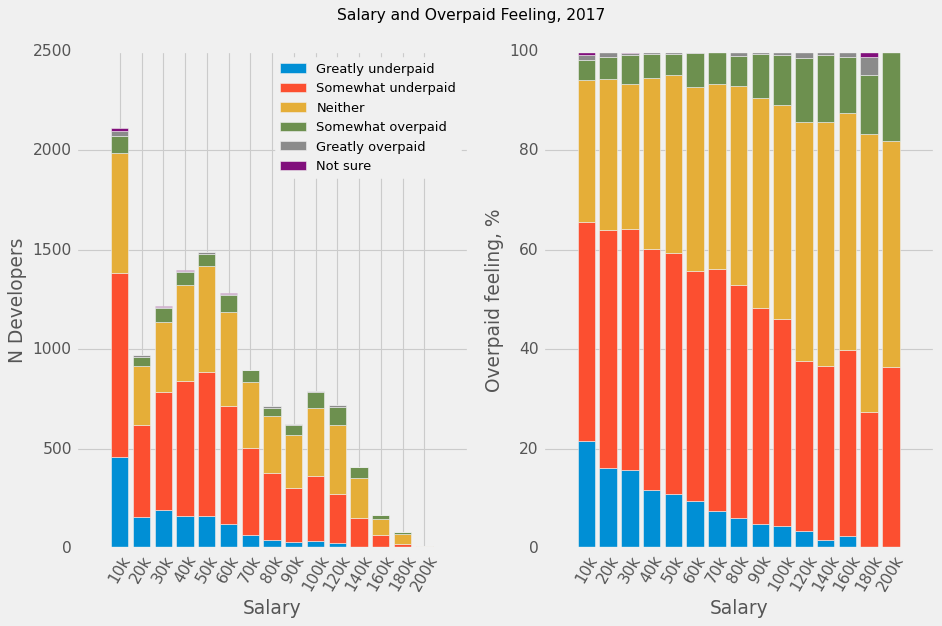

In [222]:
bottom = len(intervals) * [0]
ticks = np.arange(len(intervals))
labels = convert_xticks(intervals)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
for overpaid in overpaid_dict:
    axes[0].bar(ticks, salary_overpaid_2017[overpaid], bottom=bottom)
    bottom += salary_overpaid_2017[overpaid]
    
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('N Developers')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels, rotation=60)
axes[0].legend(labels=overpaid_dict.values(), fontsize='small')

bottom = len(intervals) * [0]
for overpaid in overpaid_dict:
    row = salary_overpaid_2017[overpaid] * 100 / salary_overpaid_2017['Total']
    axes[1].bar(ticks, row, bottom=bottom)
    bottom += row
    
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Overpaid feeling, %')
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(labels, rotation=60)
axes[1].legend([]).set_visible(False)

fig.suptitle('Salary and Overpaid Feeling, 2017')

fig.tight_layout()
plt.show()

In [36]:
salary_overpaid_2017

,Overpaid_Neither underpaid nor overpaid,Overpaid_Somewhat underpaid,Overpaid_Somewhat overpaid,Overpaid_Greatly underpaid,Overpaid_Unknown,Overpaid_Greatly overpaid,Total
Salary,,,,,,,
10000,603.0,928.0,86.0,457.0,17.0,21.0,2112.0
20000,295.0,466.0,43.0,156.0,1.0,10.0,971.0
30000,356.0,590.0,71.0,193.0,4.0,5.0,1219.0
40000,481.0,678.0,66.0,163.0,1.0,8.0,1397.0
50000,534.0,721.0,62.0,164.0,2.0,7.0,1490.0
60000,474.0,592.0,88.0,121.0,2.0,4.0,1281.0
70000,334.0,435.0,57.0,68.0,1.0,1.0,896.0
80000,285.0,334.0,43.0,44.0,1.0,7.0,714.0
90000,265.0,271.0,55.0,31.0,1.0,3.0,626.0


In [221]:
def list_to_dummies(col, sep=";"):
    """Converts list values in the series to dummies df.
    Args:
      col (Pandas.Series): Column with lists, that will be separated and exploded.
      sep (str): Separator of the list values.
    Returns:
      Pandas.DataFrame with dummies from initial column list values.
    """
    split = col.str.split(sep)
    explode = split.explode()
    dummies = pd.get_dummies(explode)
    return dummies.sum(level=0)

def plot_pair(df, group, col_order):
    groupped = df.copy()
    groupped = groupped.groupby(by=group).sum().T
    groupped['Total'] = groupped.sum(axis=1)
    groupped = groupped.sort_values(by='Total', ascending=False)
    groupped[col_order].plot.barh(stacked=True, figsize=(15,10))

def plot_pair_pct(df, group, col_order):
    groupped = df.copy()
    groupped = groupped.groupby(by=group).sum().T
    groupped['Total'] = groupped.sum(axis=1)
    groupped_pct = groupped.apply(lambda x: x*100 / x['Total'], axis=1)
    groupped_pct['Satisfaction'] = groupped_pct[col_order[-2:]].sum(axis=1)
    groupped_pct = groupped_pct.sort_values(by='Satisfaction', ascending=False)
    groupped_pct[col_order].plot.barh(stacked=True, figsize=(15,20))

In [16]:
survey_2018 = pd.read_csv(surveys['2018']['data'], low_memory=False)
print(survey_2018.shape, survey_2018.columns.tolist())

(98855, 129) ['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'Currency', 'Salary', 'SalaryType', 'ConvertedSalary', 'CurrencySymbol', 'C

In [220]:
from itertools import chain

survey_2018_clean = survey_2018.copy()
survey_2018_clean = survey_2018_clean.dropna(subset=['LanguageWorkedWith'])

dummies = list_to_dummies(survey_2018_clean['LanguageWorkedWith'])
print(dummies.sum().sort_values(ascending=False))

survey_2018_ = pd.concat([survey_2018_clean['JobSatisfaction'], dummies], axis=1)

JavaScript              54686
HTML                    53628
CSS                     50979
SQL                     44670
Java                    35521
Bash/Shell              31172
Python                  30359
C#                      26954
PHP                     24071
C++                     19872
C                       18042
TypeScript              13626
Ruby                     7911
Swift                    6310
Assembly                 5760
Go                       5532
Objective-C              5510
VB.NET                   5254
R                        4813
Matlab                   4564
VBA                      3810
Kotlin                   3508
Scala                    3420
Groovy                   3373
Perl                     3280
Visual Basic 6           3087
Lua                      2733
CoffeeScript             2603
Delphi/Object Pascal     2025
Haskell                  1961
Rust                     1857
F#                       1115
Clojure                  1032
Erlang    

In [86]:
search_schema(pd.read_csv(surveys['2018']['schema']), 'language')

,Column,QuestionText
20,AssessJob4,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The languages, frameworks, and other technologies I'd be working with"
65,LanguageWorkedWith,"Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
66,LanguageDesireNextYear,"Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
92,AdsPriorities7,"Please rank the following advertising qualities in order of their importance to you (by dragging the choices up and down), where 1 is the most important, and 7 is the least important. The advertisement avoids fluffy or vague language"


In [88]:
language_satisfaction_2018 = survey_2018_.groupby(by='JobSatisfaction').sum().T
language_satisfaction_2018

JobSatisfaction,Extremely dissatisfied,Extremely satisfied,Moderately dissatisfied,Moderately satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied
Assembly,152.0,726.0,297.0,1360.0,296.0,350.0,509.0
Bash/Shell,819.0,5130.0,2259.0,9896.0,1628.0,2514.0,3430.0
C,452.0,2231.0,1052.0,4467.0,972.0,1227.0,1831.0
C#,729.0,3915.0,1956.0,8367.0,1522.0,2225.0,3222.0
C++,497.0,2520.0,1163.0,5206.0,1034.0,1376.0,2107.0
CSS,1341.0,7446.0,3621.0,15199.0,2855.0,4027.0,5859.0
Clojure,37.0,202.0,85.0,292.0,51.0,87.0,94.0
Cobol,28.0,79.0,36.0,141.0,44.0,49.0,64.0
CoffeeScript,70.0,466.0,182.0,808.0,159.0,198.0,292.0
Delphi/Object Pascal,77.0,283.0,144.0,567.0,128.0,154.0,242.0


In [89]:
language_satisfaction_2018.columns.tolist()

['Extremely dissatisfied',
 'Extremely satisfied',
 'Moderately dissatisfied',
 'Moderately satisfied',
 'Neither satisfied nor dissatisfied',
 'Slightly dissatisfied',
 'Slightly satisfied']

In [233]:
columns_sorted_2018 = [
    'Extremely dissatisfied',
    'Moderately dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Moderately satisfied',
    'Extremely satisfied'
]
language_satisfaction_2018_ = language_satisfaction_2018[columns_sorted_2018]
language_satisfaction_2018_

JobSatisfaction,Extremely dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Extremely satisfied
Assembly,152.0,297.0,350.0,296.0,509.0,1360.0,726.0
Bash/Shell,819.0,2259.0,2514.0,1628.0,3430.0,9896.0,5130.0
C,452.0,1052.0,1227.0,972.0,1831.0,4467.0,2231.0
C#,729.0,1956.0,2225.0,1522.0,3222.0,8367.0,3915.0
C++,497.0,1163.0,1376.0,1034.0,2107.0,5206.0,2520.0
CSS,1341.0,3621.0,4027.0,2855.0,5859.0,15199.0,7446.0
Clojure,37.0,85.0,87.0,51.0,94.0,292.0,202.0
Cobol,28.0,36.0,49.0,44.0,64.0,141.0,79.0
CoffeeScript,70.0,182.0,198.0,159.0,292.0,808.0,466.0
Delphi/Object Pascal,77.0,144.0,154.0,128.0,242.0,567.0,283.0


['Assembly',
 'Bash/Shell',
 'C',
 'C#',
 'C++',
 'CSS',
 'Clojure',
 'Cobol',
 'CoffeeScript',
 'Delphi/Object Pascal',
 'Erlang',
 'F#',
 'Go',
 'Groovy',
 'HTML',
 'Hack',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lua',
 'Matlab',
 'Objective-C',
 'Ocaml',
 'PHP',
 'Perl',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VB.NET',
 'VBA',
 'Visual Basic 6']

In [238]:
language_satisfaction_2018['Total']

Assembly                 3690.0
Bash/Shell              25676.0
C                       12232.0
C#                      21936.0
C++                     13903.0
CSS                     40348.0
Clojure                   848.0
Cobol                     441.0
CoffeeScript             2175.0
Delphi/Object Pascal     1595.0
Erlang                    703.0
F#                        925.0
Go                       4634.0
Groovy                   2972.0
HTML                    42244.0
Hack                      162.0
Haskell                  1336.0
Java                    27058.0
JavaScript              44306.0
Julia                     278.0
Kotlin                   2877.0
Lua                      2041.0
Matlab                   3089.0
Objective-C              4590.0
Ocaml                     296.0
PHP                     18673.0
Perl                     2702.0
Python                  22927.0
R                        3672.0
Ruby                     6532.0
Rust                     1387.0
SQL     

In [256]:
language_satisfaction_2018_pct

JobSatisfaction,Extremely dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Extremely satisfied,Total,Satisfaction,Dissatisfaction
Ruby,220.0,568.0,593.0,386.0,845.0,2527.0,1393.0,6532.0,0.729486,0.211421
Groovy,103.0,252.0,276.0,186.0,386.0,1193.0,576.0,2972.0,0.725101,0.212315
TypeScript,356.0,983.0,1181.0,757.0,1685.0,4514.0,2345.0,11821.0,0.722781,0.213180
Go,157.0,393.0,454.0,282.0,593.0,1748.0,1007.0,4634.0,0.722486,0.216659
Matlab,90.0,246.0,300.0,224.0,485.0,1155.0,589.0,3089.0,0.721593,0.205892
F#,31.0,80.0,87.0,60.0,125.0,334.0,208.0,925.0,0.721081,0.214054
Kotlin,102.0,232.0,273.0,198.0,412.0,1112.0,548.0,2877.0,0.720195,0.210984
CoffeeScript,70.0,182.0,198.0,159.0,292.0,808.0,466.0,2175.0,0.720000,0.206897
Swift,178.0,451.0,446.0,352.0,714.0,1911.0,1037.0,5089.0,0.719591,0.211240
Rust,43.0,109.0,143.0,94.0,154.0,562.0,282.0,1387.0,0.719539,0.212689


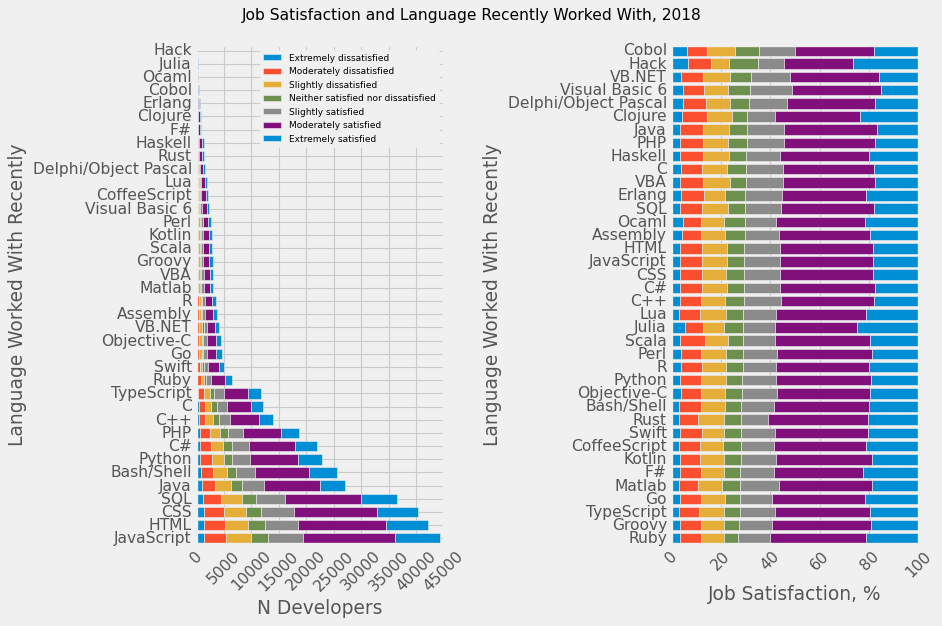

In [257]:
language_satisfaction_2018 = language_satisfaction_2018_.copy()
language_satisfaction_2018['Total'] = language_satisfaction_2018.sum(axis=1)
language_satisfaction_2018['Satisfaction'] = language_satisfaction_2018[columns_sorted_2018[-3:]].sum(axis=1) / language_satisfaction_2018['Total']
language_satisfaction_2018['Dissatisfaction'] = language_satisfaction_2018[columns_sorted_2018[:3]].sum(axis=1) / language_satisfaction_2018['Total']
language_satisfaction_2018 = language_satisfaction_2018.sort_values(by='Total', ascending=False)

left = language_satisfaction_2018.shape[0] * [0]
labels = language_satisfaction_2018.index.tolist()
ticks = np.arange(len(labels))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
for column in columns_sorted_2018:
    axes[0].barh(language_satisfaction_2018.index.tolist(), language_satisfaction_2018[column], left=left)
    left += language_satisfaction_2018[column]
    
axes[0].set_xlabel('N Developers')
axes[0].set_ylabel('Language Worked With Recently')
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].legend(labels=columns_sorted_2018, fontsize='xx-small', loc='upper right')

language_satisfaction_2018_pct = language_satisfaction_2018.copy()
language_satisfaction_2018_pct = language_satisfaction_2018_pct.sort_values(by='Satisfaction', ascending=False)
left = language_satisfaction_2018_pct.shape[0] * [0]
for column in columns_sorted_2018:
    row = language_satisfaction_2018_pct[column] * 100 / language_satisfaction_2018_pct['Total']
    axes[1].barh(language_satisfaction_2018_pct.index.tolist(), row, left=left)
    left += row
    
axes[1].set_xlabel('Job Satisfaction, %')
axes[1].set_ylabel('Language Worked With Recently')
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].legend([]).set_visible(False)

fig.suptitle('Job Satisfaction and Language Recently Worked With, 2018')

fig.tight_layout()
plt.show()

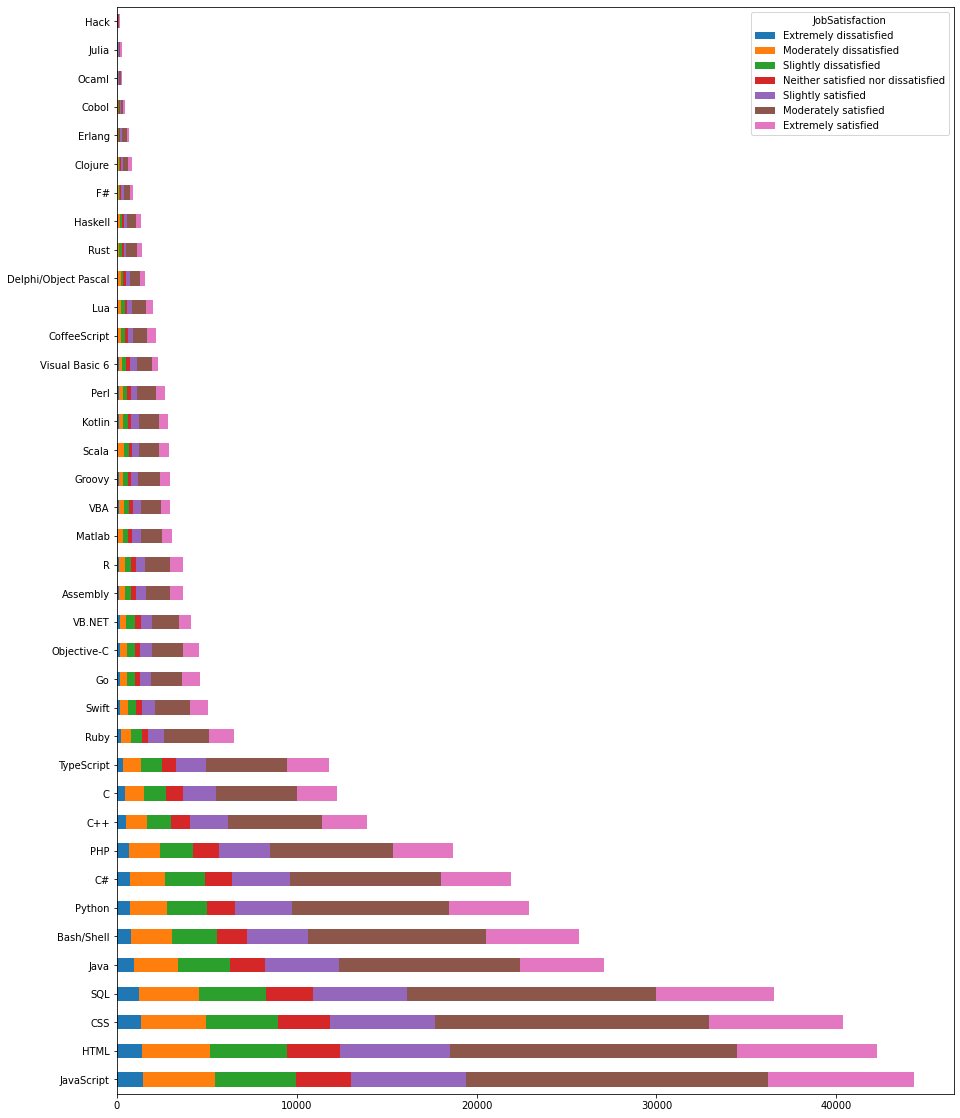

In [106]:
language_satisfaction_2018_abs = language_satisfaction_2018.copy()
language_satisfaction_2018_abs['Total'] = language_satisfaction_2018_abs.sum(axis=1)
language_satisfaction_2018_abs = language_satisfaction_2018_abs.sort_values(by='Total', ascending=False)
language_satisfaction_2018_abs[columns_sorted_2018].plot.barh(stacked=True, figsize=(15,20));

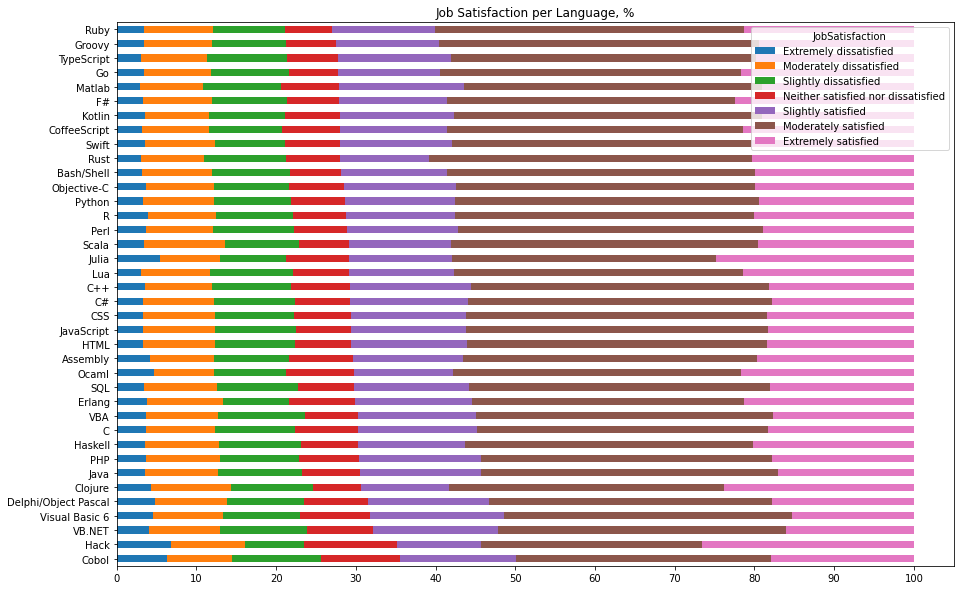

In [105]:
language_satisfaction_2018_pct = language_satisfaction_2018.copy()
language_satisfaction_2018_pct['Total'] = language_satisfaction_2018_pct.sum(axis=1)
language_satisfaction_2018_pct['Satisfied'] = language_satisfaction_2018_pct[['Slightly satisfied', 'Moderately satisfied', 'Extremely satisfied']].sum(axis=1)
language_satisfaction_2018_pct['Dissatisfied'] = language_satisfaction_2018_pct[['Extremely dissatisfied', 'Moderately dissatisfied', 'Slightly dissatisfied']].sum(axis=1)
language_satisfaction_2018_pct = language_satisfaction_2018_pct.apply(lambda x: x * 100 / x['Total'], axis=1)
language_satisfaction_2018_pct.sort_values(by='Satisfied', ascending=True, inplace=True)
language_satisfaction_2018_pct[columns_sorted_2018].plot(kind='barh', stacked=True, figsize=(15,10), title='Job Satisfaction per Language, %', xticks=[i for i in range(0, 101, 10)]);

In [103]:
language_satisfaction_2018_pct

JobSatisfaction,Extremely dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Extremely satisfied,Total,Satisfied,Dissatisfied
Cobol,6.349206,8.163265,11.111111,9.977324,14.512472,31.972789,17.913832,100.0,64.399093,25.623583
Hack,6.790123,9.259259,7.407407,11.728395,10.493827,27.777778,26.543210,100.0,64.814815,23.456790
VB.NET,4.066410,8.854668,10.972089,8.301251,15.591915,36.188643,16.025024,100.0,67.805582,23.893167
Visual Basic 6,4.592721,8.752166,9.662045,8.795494,16.767764,36.091854,15.337955,100.0,68.197574,23.006932
Delphi/Object Pascal,4.827586,9.028213,9.655172,8.025078,15.172414,35.548589,17.742947,100.0,68.463950,23.510972
Clojure,4.363208,10.023585,10.259434,6.014151,11.084906,34.433962,23.820755,100.0,69.339623,24.646226
Java,3.562717,9.124843,10.540321,7.310222,15.134156,37.257003,17.070737,100.0,69.461897,23.227881
PHP,3.625556,9.318267,9.912708,7.593852,15.219836,36.592942,17.736839,100.0,69.549617,22.856531
Haskell,3.592814,9.281437,10.254491,7.185629,13.398204,36.152695,20.134731,100.0,69.685629,23.128743
C,3.695226,8.600392,10.031066,7.946370,14.968934,36.518967,18.239045,100.0,69.726946,22.326684


In [94]:
survey_2019 = pd.read_csv(surveys['2019']['data'], low_memory=False)
print(survey_2019.shape, survey_2019.columns.tolist())

(88883, 85) ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFr

In [95]:
survey_2019['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                                      1483
C#;HTML/CSS;JavaScript;SQL                                                                       1414
HTML/CSS;JavaScript                                                                              1247
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                             990
Java                                                                                              934
                                                                                                 ... 
Assembly;Bash/Shell/PowerShell;C++;C#;HTML/CSS;Java;PHP;Python;SQL                                  1
Assembly;Bash/Shell/PowerShell;C++;C#;Dart;HTML/CSS;Java;JavaScript;PHP;Python;SQL;TypeScript       1
C;C++;C#;Go;JavaScript;PHP;Python;SQL;TypeScript                                                    1
C;C++;C#;Java;Python;R;SQL;Other(s):                                              

In [96]:
survey_2019['CareerSat'].value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

In [97]:
survey_2019['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

In [98]:
columns_sorted_2019 = [
    'Very dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Very satisfied'
]

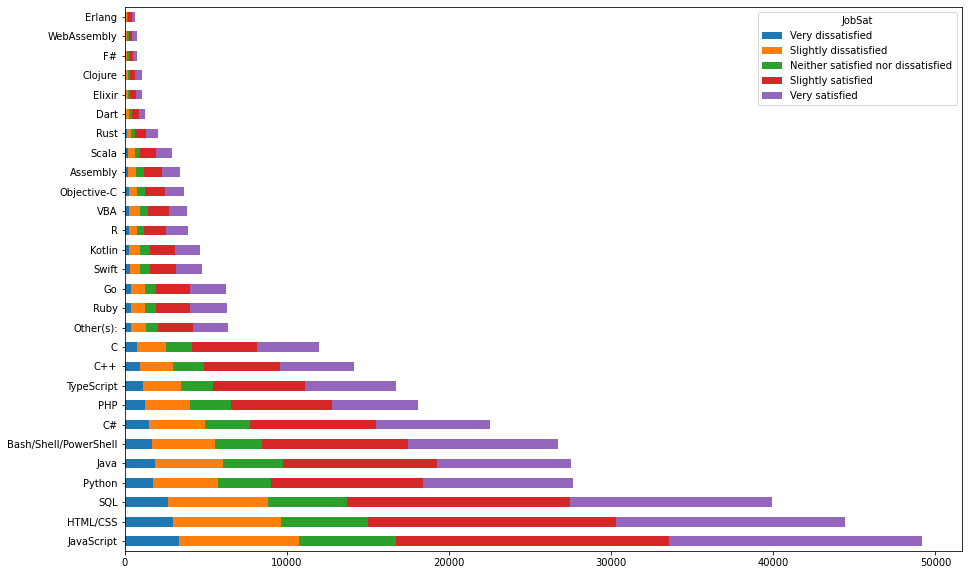

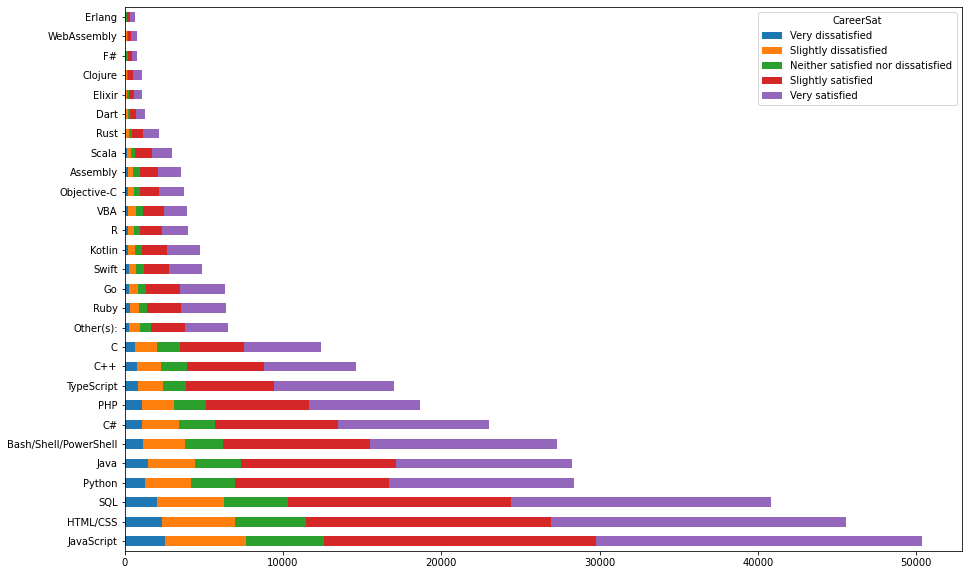

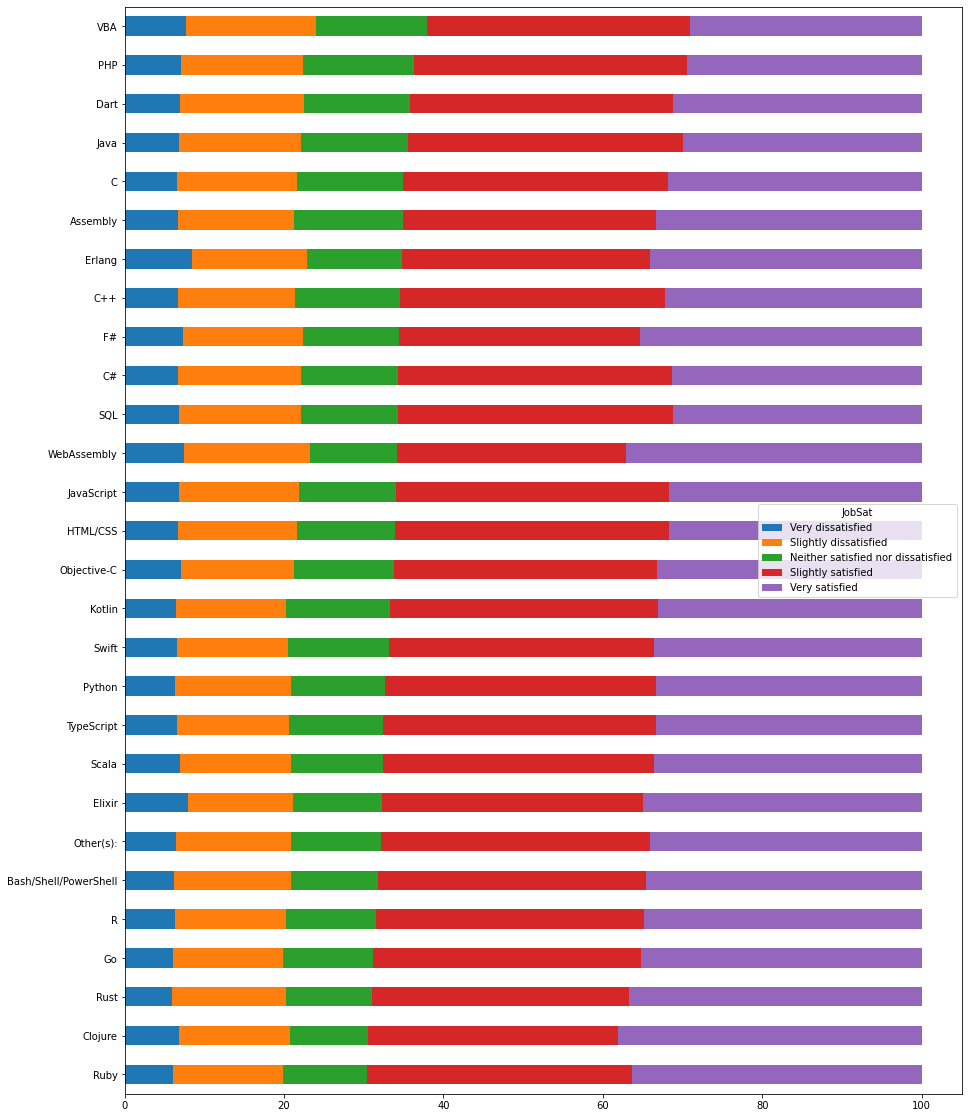

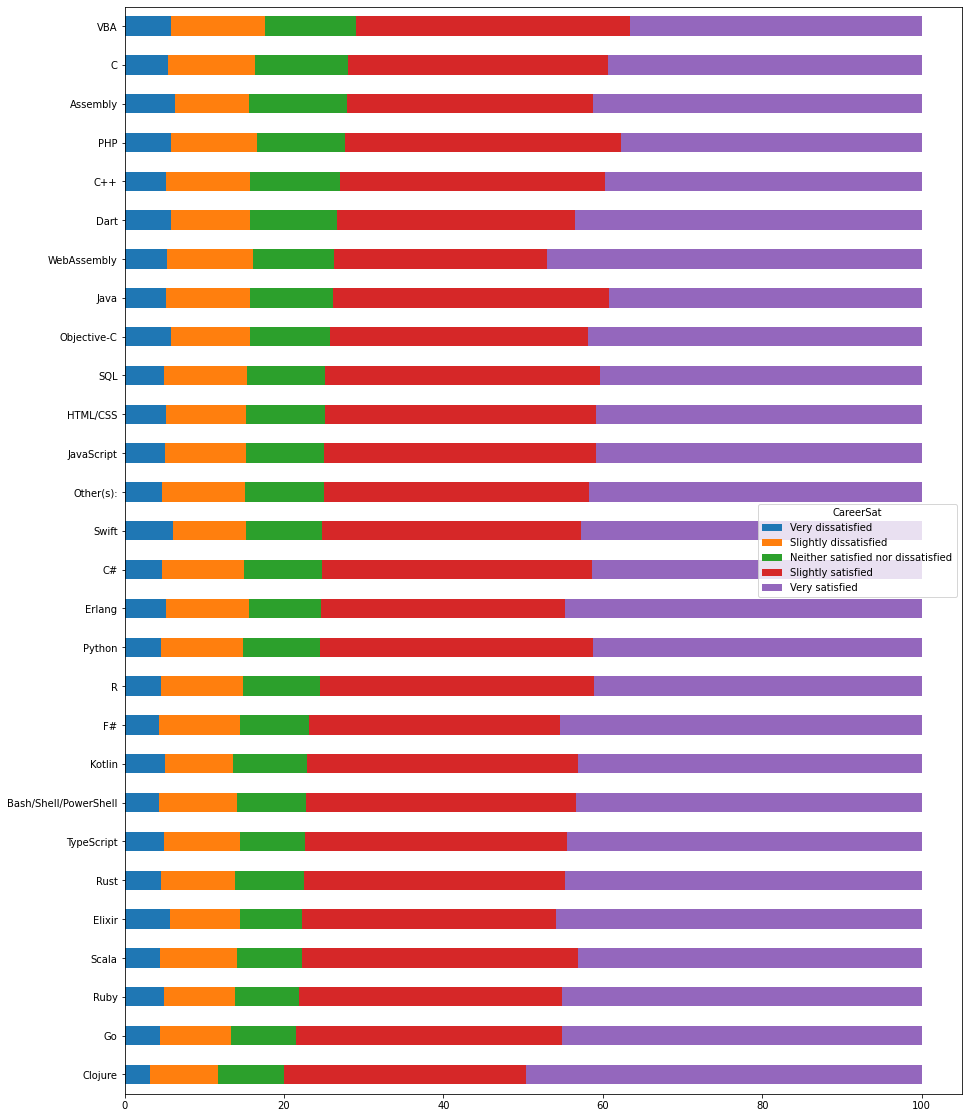

In [168]:
dummies = list_to_dummies(survey_2019['LanguageWorkedWith'])
survey_2019_clean = pd.concat([survey_2019[['JobSat', 'CareerSat']], dummies], axis=1)
plot_pair(survey_2019_clean, 'JobSat', columns_sorted_2019)
plot_pair(survey_2019_clean, 'CareerSat', columns_sorted_2019)
plot_pair_pct(survey_2019_clean, 'JobSat', columns_sorted_2019)
plot_pair_pct(survey_2019_clean, 'CareerSat', columns_sorted_2019)